In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline


In [2]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape


(1338, 7)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


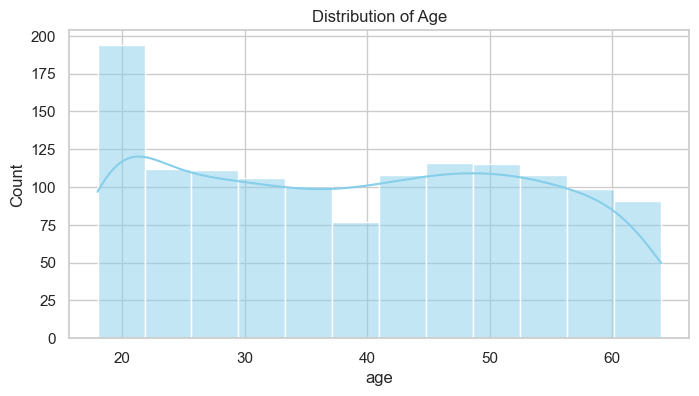

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.show()


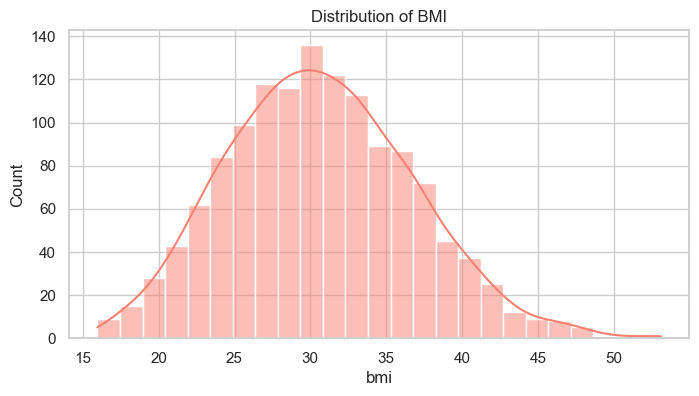

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df['bmi'], kde=True, color='salmon')
plt.title('Distribution of BMI')
plt.show()


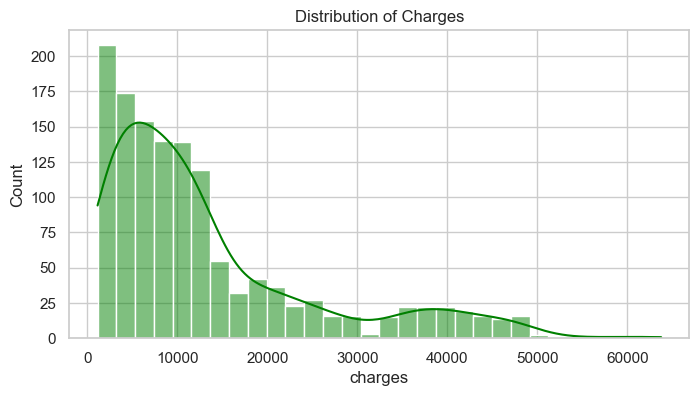

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['charges'], kde=True, color='green')
plt.title('Distribution of Charges')
plt.show()


C:\Users\YASH\AppData\Local\Temp\ipykernel_1324\2475844210.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


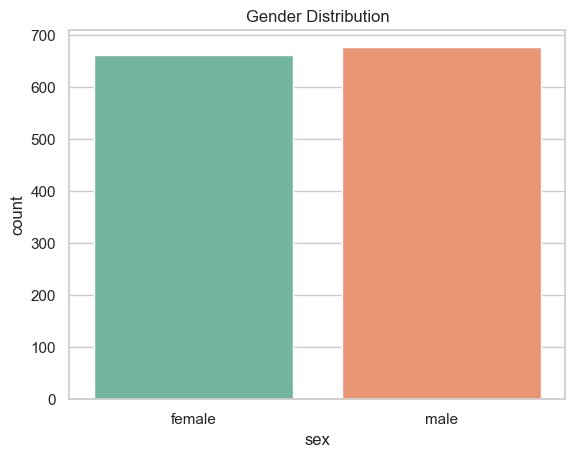

In [9]:
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()


C:\Users\YASH\AppData\Local\Temp\ipykernel_1324\4205218193.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='Set1')


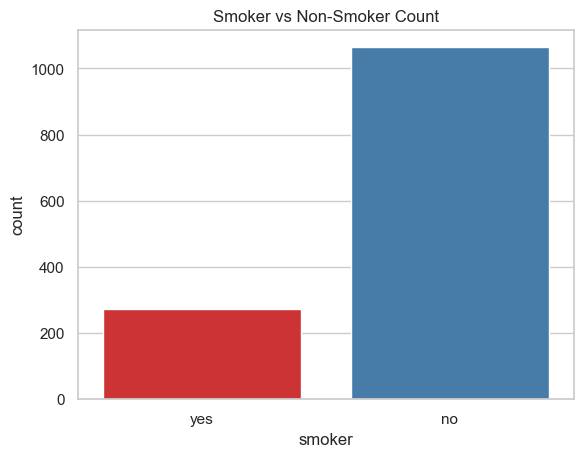

In [13]:
sns.countplot(x='smoker', data=df, palette='Set1')
plt.title('Smoker vs Non-Smoker Count')
plt.show()


C:\Users\YASH\AppData\Local\Temp\ipykernel_1324\104094419.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='pastel')


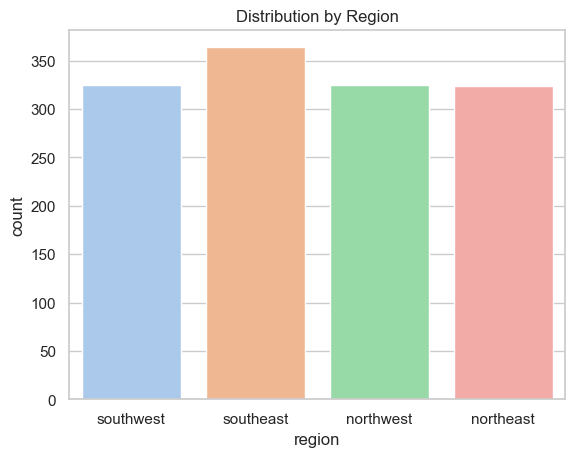

In [11]:
sns.countplot(x='region', data=df, palette='pastel')
plt.title('Distribution by Region')
plt.show()


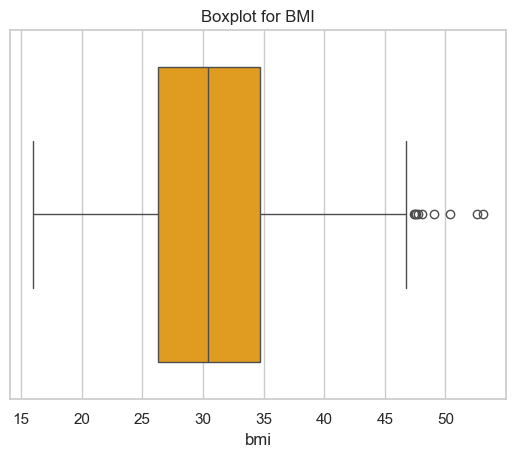

In [16]:
sns.boxplot(x=df['bmi'], color='orange')
plt.title('Boxplot for BMI')
plt.show()


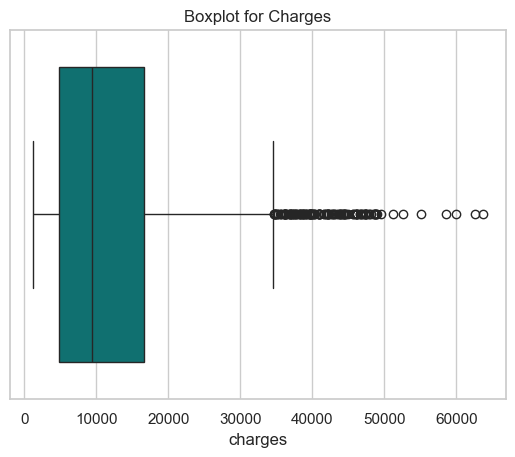

In [17]:
sns.boxplot(x=df['charges'], color='teal')
plt.title('Boxplot for Charges')
plt.show()


In [18]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['charges'] < Q1 - 1.5 * IQR) | (df['charges'] > Q3 + 1.5 * IQR)]
outliers.shape[0]


139

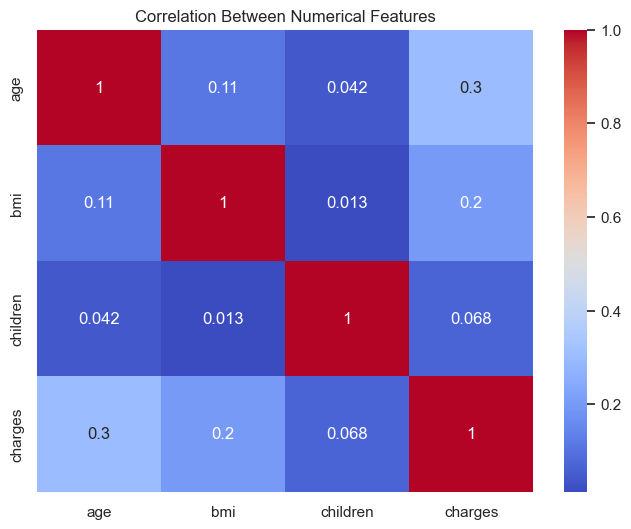

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()


C:\Users\YASH\AppData\Local\Temp\ipykernel_1324\3455104587.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set1')


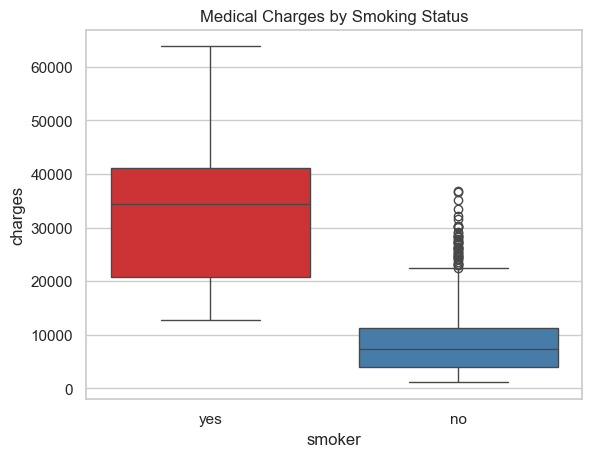

In [20]:
sns.boxplot(x='smoker', y='charges', data=df, palette='Set1')
plt.title('Medical Charges by Smoking Status')
plt.show()


C:\Users\YASH\AppData\Local\Temp\ipykernel_1324\2175448660.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=df, palette='Set3')


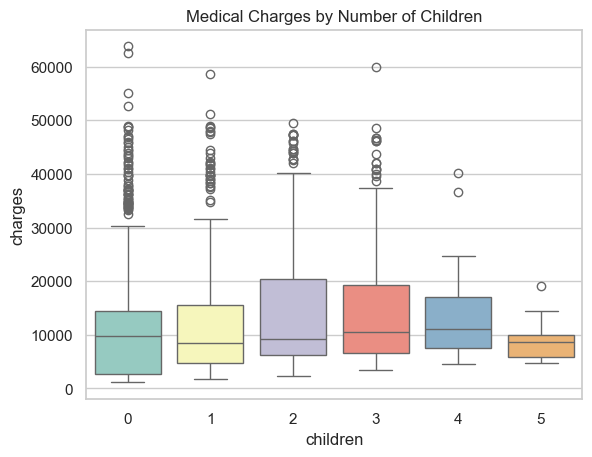

In [21]:
sns.boxplot(x='children', y='charges', data=df, palette='Set3')
plt.title('Medical Charges by Number of Children')
plt.show()


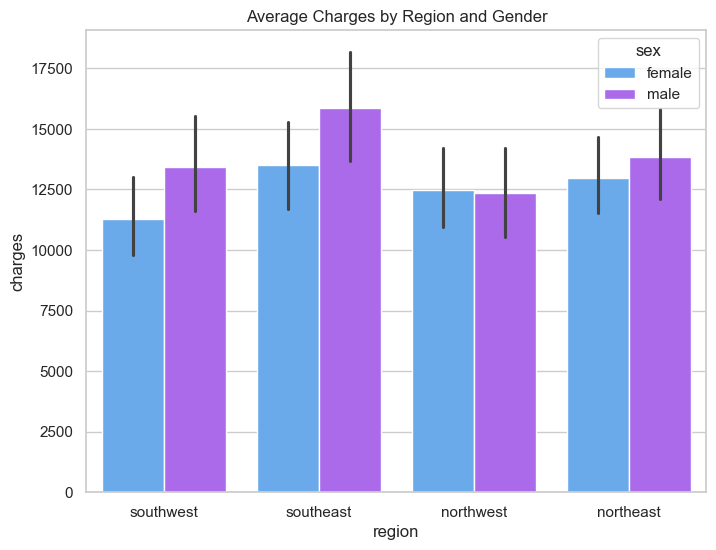

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.title('Average Charges by Region and Gender')
plt.show()


In [25]:
df.groupby(['smoker', 'sex'])['charges'].mean().reset_index().sort_values(by='charges', ascending=False)


,smoker,sex,charges
3,yes,male,33042.005975
2,yes,female,30678.996276
0,no,female,8762.297300
1,no,male,8087.204731


In [26]:
df.groupby(['region', 'smoker'])['charges'].mean().reset_index().sort_values(by='charges', ascending=False)


,region,smoker,charges
5,southeast,yes,34844.996824
7,southwest,yes,32269.063494
3,northwest,yes,30192.003182
1,northeast,yes,29673.536473
0,northeast,no,9165.531672
2,northwest,no,8556.463715
4,southeast,no,8032.216309
6,southwest,no,8019.284513


In [27]:
df.groupby(['sex', 'children'])['bmi'].mean().reset_index().sort_values(by='bmi', ascending=False)


,sex,children,bmi
4,female,4,31.943182
8,male,2,31.300992
7,male,1,31.166145
10,male,4,30.957500
9,male,3,30.922937
6,male,0,30.741719
2,female,2,30.649790
5,female,5,30.620625
3,female,3,30.436429
0,female,0,30.361522


In [28]:
df.groupby(['children', 'smoker'])['charges'].mean().reset_index().sort_values(by='charges', ascending=False)


,children,smoker,charges
5,2,yes,33844.235755
7,3,yes,32724.915268
3,1,yes,31822.654334
1,0,yes,31341.363954
9,4,yes,26532.276933
11,5,yes,19023.260000
8,4,no,12121.344408
6,3,no,9614.519391
4,2,no,9493.093674
2,1,no,8303.109350


In [29]:
df.groupby('region')['charges'].agg(['mean', 'sum', 'count']).sort_values(by='mean', ascending=False)


,mean,sum,count
region,,,
southeast,14735.411438,5.363690e+06,364
northeast,13406.384516,4.343669e+06,324
northwest,12417.575374,4.035712e+06,325
southwest,12346.937377,4.012755e+06,325


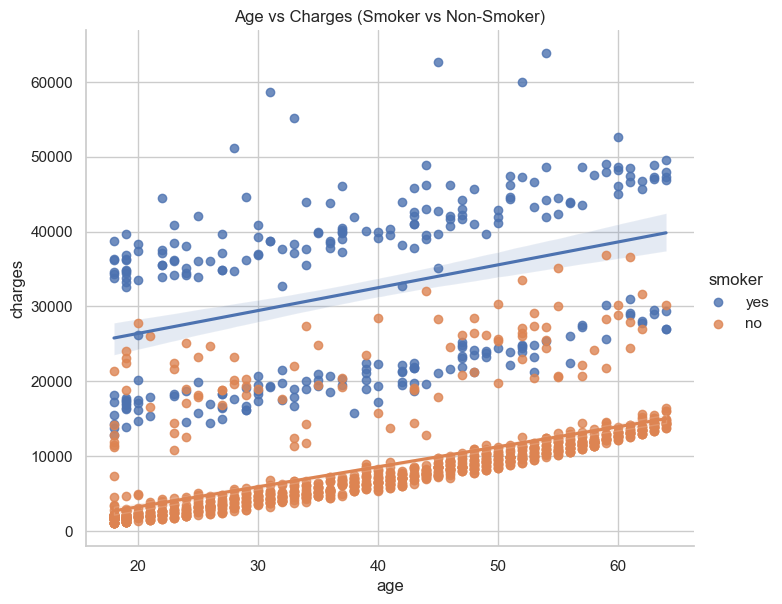

In [23]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df, height=6, aspect=1.2)
plt.title('Age vs Charges (Smoker vs Non-Smoker)')
plt.show()


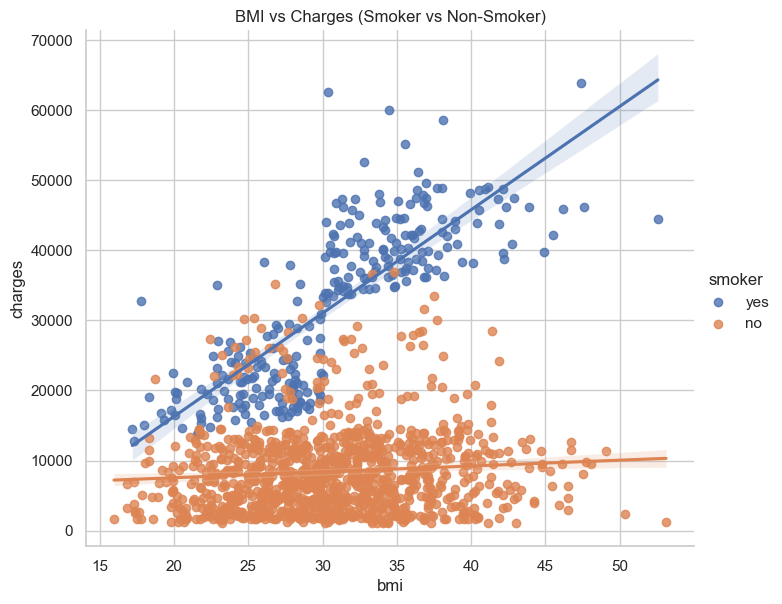

In [24]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, height=6, aspect=1.2)
plt.title('BMI vs Charges (Smoker vs Non-Smoker)')
plt.show()
